In [6]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import copy
import sys

sys.path.append('../src')
import utils as ut

In [7]:
#runs = ['ctrl','half','hal2','totl','tot2']
runs = ['ctrl','hal2','tot2']

In [8]:
cols = {}
cols['ctrl'] = '.5'
cols['quar'] = ut.scol['119']
cols['half'] = ut.scol['126']
cols['hal2'] = ut.scol['126']
cols['totl'] = ut.scol['245']
cols['tot2'] = ut.scol['245']
cols['doub'] = ut.scol['585']


lss = {}
lss['ctrl'] = '-'
lss['quar'] = '-'
lss['half'] = '-'
lss['hal2'] = '-'
lss['totl'] = '-'
lss['tot2'] = '-'
lss['doub'] = '-'

lws = {}
lws['ctrl'] = .5
lws['quar'] = .5
lws['half'] = .5
lws['hal2'] = 1
lws['totl'] = .5
lws['tot2'] = 1
lws['doub'] = 1

In [9]:
mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.hspace'] = .1
mpl.rcParams['figure.subplot.left'] = .1
mpl.rcParams['figure.subplot.right'] = .9
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['figure.figsize'] = (20,8)
mpl.rcParams['figure.subplot.bottom'] = .08


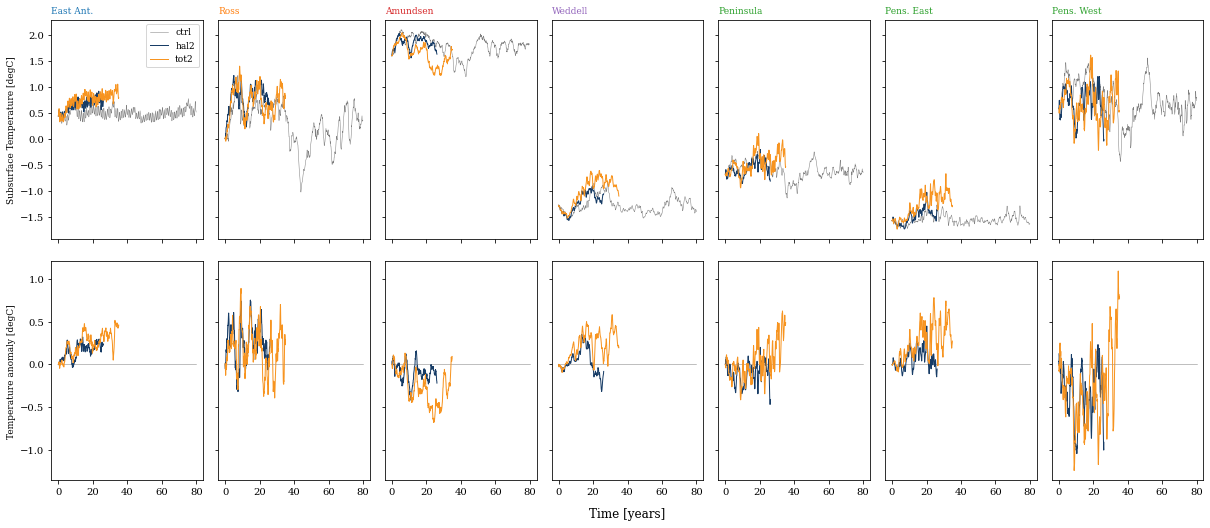

In [10]:
tmax = 80*12

fig,ax = plt.subplots(2,7,sharex=True,sharey='row')

ctrl = xr.open_dataset(f'../data/temperature_mon_ctrl.nc').isel(time=slice(0,tmax))

for r,run in enumerate(runs):
    ds = xr.open_dataset(f'../data/temperature_mon_{run}.nc').isel(time=slice(0,tmax))
    for b,bas in enumerate(ds.basin.values):
        ax[0,b].plot(ds.time/12,ds.temp.sel(basin=bas),c=cols[run],ls=lss[run],lw=lws[run],label=run)
        ax[1,b].plot(ds.time/12,ds.temp.sel(basin=bas)-ctrl.temp.sel(basin=bas),c=cols[run],ls=lss[run],lw=lws[run])
        ax[0,b].set_title(bas,color=ut.bcol[bas],loc='left')
    ds.close()

ax[0,0].legend()
ax[0,0].set_ylabel('Subsurface Temperature [degC]')
ax[1,0].set_ylabel('Temperature anomaly [degC]')
fig.supxlabel('Time [years]')
plt.show()